In [393]:
import requests
import inspect
import pytz
import pandas as pd
from pprint import pprint

from time import ctime   # ctime converts epoch time (ex:1661522400) to string form (Thu Aug 25 16:00:00 2022)
from time import gmtime   # Convert a time expressed in seconds since the epoch to a struct_time in UTC in which the dst flag is always zero.
from time import localtime # Like gmtime() but converts to local time.

from datetime import datetime, timedelta
today = datetime.now()
import datetime as dt

debug = False

# test
#debug= True

# Classes

In [394]:
class Dict2Class(object):
    '''
    Turns a dictionary into a class - Do not convert embedded dictionaries
    '''
    def __init__(self, my_dict):  
        print('\nName of dictionary object:',object.__name__)
        try:
            print('\nName in dictionary : ',my_dict['__name__']) 
        except:
            print('\nGlobal name : ',name_of_global_obj(my_dict))  
            setattr(self,'__name__', name_of_global_obj(my_dict)) 
        
            
        for key in my_dict:
            #current dict
            if key == 'dt':
                setattr(self,'human_dt',human_date(my_dict[key]))
            if key == 'sys':
                    setattr(self,'human_sr',human_date(my_dict[key]['sunrise']))
                    setattr(self,'human_ss',human_date(my_dict[key]['sunset']))
            print('Key ',key,my_dict[key])
            try:
                setattr(self, key, my_dict[key])
                # onecall dict
                if key == 'current':
                    setattr(self,'human_dt',human_date(my_dict[key]['dt']))
                    setattr(self,'human_sr',human_date(my_dict[key]['sunrise']))
                    setattr(self,'human_ss',human_date(my_dict[key]['sunset']))
            except:
                pass
    
    def get_alerts(self):
        try:
            for alert in self.alerts:            
                #pprint(self.alerts)
                desc = alert['description']
                # https://www.epochconverter.com/
                start = ctime(self.alerts[0]['start'])        
                end = ctime(self.alerts[0]['end'])
                # event, tags, description, source
                event = alert['event']
                tags = alert['tags']
                source = alert['sender_name']
                print('Start:',start, '\nEnd:',end)        
                print(desc)
                
                print(event,tags)        
                print('Source:',source)
                print()
        except:
                print('No alerts')
    
    
    def show_attributes(self, debug = False):
        print('\nAttributes :\n')
        for i in inspect.getmembers(self):
            if debug: print(i)
            # to remove private and protected
            # functions
            if not i[0].startswith('_'):
                
                # To remove other methods that
                # do not start with a underscore
                if not inspect.ismethod(i[1]): 
                    print(i[0],':',i[1])


In [395]:
class onecallclass(object):
    '''convert all embedded dictionary to class attributes'''
    def __init__(self, my_dict):
        onecall_class =  Dict2Class(my_dict)
        print('\nName of Onecall object :',onecall_class.__name__)  
        setattr(self,'__name__', name_of_global_obj(my_dict))  
#         self.t_day = []
#         self.t_eve = []
#         self.t_morning = []
#         t_day = []
#         t_eve = []
#         t_morning = []
        for k in onecall_class.__dict__.keys():
            value = onecall_class.__getattribute__(k)
            print('Key :', k, value)
            if k=='alerts':
                self.alerts = value
                break
            if isinstance(value, dict):
                #if debug: print('--------------------------------------------------')
                print('Instancing with', k, value)
                value['__name__'] = k
                print('Value',value)
                setattr(self, k, Dict2Class(value))
            elif isinstance(value, list):
                #print(value,'>>>>>',len(value))
                #if debug: print('++++++++++++++++++++++++++++++++++++++++++++++++++')
                #print('List of',len(value),'dictionaries computing', value)
                if len(value)==1:
                    v = value[0]
                    #print('line138',value,'\n***',value[0])
                    #if isinstance(value[0], list):
                    #setattr(self, k, value[0])
                    if isinstance(v, dict):
                        v['__name__'] = k
                        setattr(self, k, onecallclass(v))
                    else:
                        setattr(self, k, value[0])
                else:
                    #t_day = []
                    for i,d in enumerate(value):
                        #if debug: print('***** day',i)
                        d['__name__'] = k+str(i)
                        setattr(self, k+str(i), onecallclass(d))
                        #try:
                        #c = self.__getattribute__(k+str(i))
                        #if debug: print('***************')
                        #if debug: print(d['dt'],dir(c),c.dt)
                        #if debug: print(c.temp.day)
#                         t_eve.append(c.temp.eve)
#                         t_morning.append(c.temp.morn)
#                         t_day.append(c.temp.day)
                        #t_day.append(c.temp.day)
                        #except:
                        #    pass
                    
                #if debug: print('++++++++++++++++++++++++++++++++++++++++++++++++++')
            else:
                setattr(self, k, value)
        
#         self.t_day = t_day
#         self.t_eve = t_eve
#         self.t_morning = t_morning

    def get_alerts(self):
        try:
            for alert in self.alerts:
            
                #pprint(self.alerts)
                desc = alert['description']
                # https://www.epochconverter.com/
                start = ctime(self.alerts[0]['start'])        
                end = ctime(self.alerts[0]['end'])
                # event, tags, description, source
                event = alert['event']
                tags = alert['tags']
                source = alert['sender_name']
                print('Start:',start, '\nEnd:',end)        
                print(desc)
                
                print(event,tags)        
                print('Source:',source)
                print()
        except:
                print('No alerts')
    
    def get_weather(self):
        w = []
        
        for k in range(8):
            d = []
            d.append(self.__dict__['daily'+str(k)].__dict__['weather'].__dict__['main'])
            d.append(self.__dict__['daily'+str(k)].__dict__['weather'].__dict__['description'])
            w.append(d)
        return w
    
    def get_temperature(self):
        t_day = []
        t_min = []
        t_max =[]
        t_night = []
        t_eve = []
        t_morn = []
        for k in range(8):
            t_day.append(self.__dict__['daily'+str(k)].__dict__['temp'].__dict__['day'])
            t_min.append(self.__dict__['daily'+str(k)].__dict__['temp'].__dict__['min'])
            t_max.append(self.__dict__['daily'+str(k)].__dict__['temp'].__dict__['max'])
            t_night.append(self.__dict__['daily'+str(k)].__dict__['temp'].__dict__['night'])
            t_eve.append(self.__dict__['daily'+str(k)].__dict__['temp'].__dict__['eve'])
            t_morn.append(self.__dict__['daily'+str(k)].__dict__['temp'].__dict__['morn'])
        return t_day, t_min, t_max, t_night, t_eve, t_morn


# if debug: print('Keys :',onecall_data.keys())
# if debug: print('Current dictionary ;',onecall_data['current'])
# if debug: print('daily key contents :',onecall_data['daily'])


### Some useful functions

In [396]:
def human_date(timestamp):
   return datetime.fromtimestamp(timestamp, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S') 

In [397]:
def name_of_global_obj(xx):
    for objname, oid in globals().items():
        print(objname)
        if oid is xx:
            return objname

In [398]:
### Show attributes of Dict2Class instances (external function)
#### this method is now integrated in Dict2Class method
def show_attributes(name, class_, debug=False):
    print(name+' :')
    for i in inspect.getmembers(class_):
        if debug: print(i)
        # to remove private and protected
        # functions
        if not i[0].startswith('_'):
              
            # To remove other methods that
            # doesnot start with a underscore
            if not inspect.ismethod(i[1]): 
                print(i[0],':',i[1])



In [399]:

# class method
#onecall_current.show_attributes(True)

### Current weather data

#### Get data from http://api.openweathermap.org/data/2.5/weather

In [400]:

# locked with onecall
API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'

# my API keys
#API_Key = 'c9d926a9549ae7933324ef26e13bb200'
# API_Key = '56040ff66d50184c81a4df3a770657e3'

#city = input('Enter city name :')
city = 'gagny'
base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city

current = requests.get(base_url).json()
if debug: 
    pprint(current.keys())
    pprint(current) 
    print(current['name'],current['coord'])
    print(current['main'])


In [401]:
current

{'coord': {'lon': 2.5333, 'lat': 48.8833},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 283.8,
  'feels_like': 282.72,
  'temp_min': 282.93,
  'temp_max': 284.29,
  'pressure': 1014,
  'humidity': 69},
 'visibility': 10000,
 'wind': {'speed': 5.81, 'deg': 70, 'gust': 5.81},
 'clouds': {'all': 75},
 'dt': 1709834219,
 'sys': {'type': 2,
  'id': 2036844,
  'country': 'FR',
  'sunrise': 1709792363,
  'sunset': 1709833352},
 'timezone': 3600,
 'id': 6451993,
 'name': 'Gagny',
 'cod': 200}

In [402]:
import numpy as np
a, b = 17.27, 237.7

def alpha(T,phi):
    '''
    0 < T < 60
    0.01 < phi < 1
    '''
    return a*T/(b+T) + np.log(phi)

def dewpoint(T, phi): # phi : humidité relative
    f = alpha(T,phi)
    Tr = b*f/(a-f)
    return (T,Tr,T-Tr) #round(Tr,2), round(T-Tr,2)   # dewpoint, depression

In [403]:
dewpoint(10.0,0.88)

(10.0, 8.104002844184794, 1.8959971558152056)

In [404]:
temp=current['main']['temp']-273.14
hum=current['main']['humidity']/100
press=current['main']['pressure']
dp = dewpoint(temp,hum)[1]
etat='pluie' if (temp-dp)<5 else 'sec'
depr=temp-dp
temp,hum,press,dp,depr,etat

(10.660000000000025, 0.69, 1014, 5.206838959933421, 5.453161040066604, 'sec')

In [405]:
show_attributes('\nCurrent attribs',current)



Current attribs :
clear : <built-in method clear of dict object at 0x00000280B6822140>
copy : <built-in method copy of dict object at 0x00000280B6822140>
fromkeys : <built-in method fromkeys of type object at 0x00007FFDC981FBB0>
get : <built-in method get of dict object at 0x00000280B6822140>
items : <built-in method items of dict object at 0x00000280B6822140>
keys : <built-in method keys of dict object at 0x00000280B6822140>
pop : <built-in method pop of dict object at 0x00000280B6822140>
popitem : <built-in method popitem of dict object at 0x00000280B6822140>
setdefault : <built-in method setdefault of dict object at 0x00000280B6822140>
update : <built-in method update of dict object at 0x00000280B6822140>
values : <built-in method values of dict object at 0x00000280B6822140>


In [406]:
name_of_global_obj(current)

__name__
__doc__
__package__
__loader__
__spec__
__builtin__
__builtins__
_ih
_oh
_dh
In
Out
get_ipython
exit
quit
open
_
__
___


'___'

In [407]:
current_main = pd.DataFrame.from_dict(current['main'],orient='index',columns=['current_main'])
current_main

,current_main
temp,283.80
feels_like,282.72
temp_min,282.93
temp_max,284.29
pressure,1014.00
humidity,69.00


In [408]:
if debug: print('Temp:',current['main']['temp']-273.15)


In [409]:

lat = current['coord']['lat']
lon = current['coord']['lon']
lat, lon

(48.8833, 2.5333)

### Class Dict2Class - convert dictionaries to class type

#### Do not convert embedded dictionaries

In [410]:
# convert dictionary to class
current_class = Dict2Class(current)
current_class


Name of dictionary object: object
__name__
__doc__
__package__
__loader__
__spec__
__builtin__
__builtins__
_ih
_oh
_dh
In
Out
get_ipython
exit
quit
open
_
__
___
__vsc_ipynb_file__
_i
_ii
_iii
_i1
requests
inspect
pytz
pd
pprint
ctime
gmtime
localtime
datetime
timedelta
today
dt
debug
_i2
Dict2Class
_i3
onecallclass
_i4
human_date
_i5
name_of_global_obj
_i6
show_attributes
_i7
_i8
API_Key
city
base_url
current

Global name :  current
__name__
__doc__
__package__
__loader__
__spec__
__builtin__
__builtins__
_ih
_oh
_dh
In
Out
get_ipython
exit
quit
open
_
__
___
__vsc_ipynb_file__
_i
_ii
_iii
_i1
requests
inspect
pytz
pd
pprint
ctime
gmtime
localtime
datetime
timedelta
today
dt
debug
_i2
Dict2Class
_i3
onecallclass
_i4
human_date
_i5
name_of_global_obj
_i6
show_attributes
_i7
_i8
API_Key
city
base_url
current
Key  coord {'lon': 2.5333, 'lat': 48.8833}
Key  weather [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]
Key  base stations
Key  main {'temp': 283.8,

In [411]:
current_class.get_alerts()

No alerts


### OneCall (data for 8 days)

#### Get data from https://api.openweathermap.org/data/2.5/onecall

In [412]:
debug = True
# onecall : https://openweathermap.org/api/one-call-api
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
try:
    onecall_data = requests.get(base_url).json()
    # pprint(onecall_data)  # keys : current, lat, lon,minutely,timezone, timezone_offset
    if debug:pprint(onecall_data['current'])
except:
    exit()

#base_url

{'clouds': 75,
 'dew_point': 5.2,
 'dt': 1709834302,
 'feels_like': 9.57,
 'humidity': 69,
 'pressure': 1014,
 'sunrise': 1709792363,
 'sunset': 1709833352,
 'temp': 10.65,
 'uvi': 0,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind_deg': 70,
 'wind_gust': 5.81,
 'wind_speed': 5.81}


In [413]:
onecall_data['daily'][0]

{'dt': 1709812800,
 'sunrise': 1709792363,
 'sunset': 1709833352,
 'moonrise': 1709788800,
 'moonset': 1709818560,
 'moon_phase': 0.89,
 'temp': {'day': 11.74,
  'min': 3.48,
  'max': 12.36,
  'night': 7.59,
  'eve': 10.65,
  'morn': 3.6},
 'feels_like': {'day': 10.48, 'night': 4.86, 'eve': 9.57, 'morn': 1.64},
 'pressure': 1018,
 'humidity': 58,
 'dew_point': 3.78,
 'wind_speed': 5.45,
 'wind_deg': 98,
 'wind_gust': 11.32,
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'clouds': 19,
 'pop': 0,
 'uvi': 2.45}

In [414]:
# convert dictionary to class but embedded dictionaries are not converted
onecall_class = Dict2Class(onecall_data)


Name of dictionary object: object
__name__
__doc__
__package__
__loader__
__spec__
__builtin__
__builtins__
_ih
_oh
_dh
In
Out
get_ipython
exit
quit
open
_
__
___
__vsc_ipynb_file__
_i
_ii
_iii
_i1
requests
inspect
pytz
pd
pprint
ctime
gmtime
localtime
datetime
timedelta
today
dt
debug
_i2
Dict2Class
_i3
onecallclass
_i4
human_date
_i5
name_of_global_obj
_i6
show_attributes
_i7
_i8
API_Key
city
base_url
current
_i9
_9
_i10
np
a
b
alpha
dewpoint
_i11
temp
hum
press
dp
etat
depr
_11
_i12
_i13
_13
_i14
current_main
_14
_i15
_i16
lat
lon
_16
_i17
current_class
_17
_i18
_i19
onecall_data

Global name :  onecall_data
__name__
__doc__
__package__
__loader__
__spec__
__builtin__
__builtins__
_ih
_oh
_dh
In
Out
get_ipython
exit
quit
open
_
__
___
__vsc_ipynb_file__
_i
_ii
_iii
_i1
requests
inspect
pytz
pd
pprint
ctime
gmtime
localtime
datetime
timedelta
today
dt
debug
_i2
Dict2Class
_i3
onecallclass
_i4
human_date
_i5
name_of_global_obj
_i6
show_attributes
_i7
_i8
API_Key
city
base_url
current

In [415]:
# external call
show_attributes('\nResult attribs',onecall_class)



Result attribs :
alerts : [{'sender_name': 'METEO-FRANCE', 'event': 'Moderate flooding warning', 'start': 1709823674, 'end': 1709852400, 'description': 'Moderate damages may occur, especially in vulnerable or in exposed areas and to people who carry out weather-related activities.', 'tags': ['Flood']}, {'sender_name': 'METEO-FRANCE', 'event': 'Moderate flooding warning', 'start': 1709852460, 'end': 1709938800, 'description': 'Moderate damages may occur, especially in vulnerable or in exposed areas and to people who carry out weather-related activities.', 'tags': ['Flood']}]
current : {'dt': 1709834302, 'sunrise': 1709792363, 'sunset': 1709833352, 'temp': 10.65, 'feels_like': 9.57, 'pressure': 1014, 'humidity': 69, 'dew_point': 5.2, 'uvi': 0, 'clouds': 75, 'visibility': 10000, 'wind_speed': 5.81, 'wind_deg': 70, 'wind_gust': 5.81, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]}
daily : [{'dt': 1709812800, 'sunrise': 1709792363, 'sunset': 17098

In [416]:
name_of_global_obj(onecall_class)

__name__
__doc__
__package__
__loader__
__spec__
__builtin__
__builtins__
_ih
_oh
_dh
In
Out
get_ipython
exit
quit
open
_
__
___
__vsc_ipynb_file__
_i
_ii
_iii
_i1
requests
inspect
pytz
pd
pprint
ctime
gmtime
localtime
datetime
timedelta
today
dt
debug
_i2
Dict2Class
_i3
onecallclass
_i4
human_date
_i5
name_of_global_obj
_i6
show_attributes
_i7
_i8
API_Key
city
base_url
current
_i9
_9
_i10
np
a
b
alpha
dewpoint
_i11
temp
hum
press
dp
etat
depr
_11
_i12
_i13
_13
_i14
current_main
_14
_i15
_i16
lat
lon
_16
_i17
current_class
_17
_i18
_i19
onecall_data
_i20
_20
_i21
onecall_class


'onecall_class'

In [417]:
# print(onecall_class.alerts)
onecall_class.show_attributes(True)


Attributes :

('__class__', <class '__main__.Dict2Class'>)
('__delattr__', <method-wrapper '__delattr__' of Dict2Class object at 0x00000280B4618A30>)
('__dict__', {'__name__': 'onecall_data', 'lat': 48.8833, 'lon': 2.5333, 'timezone': 'Europe/Paris', 'timezone_offset': 3600, 'current': {'dt': 1709834302, 'sunrise': 1709792363, 'sunset': 1709833352, 'temp': 10.65, 'feels_like': 9.57, 'pressure': 1014, 'humidity': 69, 'dew_point': 5.2, 'uvi': 0, 'clouds': 75, 'visibility': 10000, 'wind_speed': 5.81, 'wind_deg': 70, 'wind_gust': 5.81, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]}, 'human_dt': '07/03/2024 18:58:22', 'human_sr': '07/03/2024 07:19:23', 'human_ss': '07/03/2024 18:42:32', 'daily': [{'dt': 1709812800, 'sunrise': 1709792363, 'sunset': 1709833352, 'moonrise': 1709788800, 'moonset': 1709818560, 'moon_phase': 0.89, 'temp': {'day': 11.74, 'min': 3.48, 'max': 12.36, 'night': 7.59, 'eve': 10.65, 'morn': 3.6}, 'feels_like': {'day': 10.48, '

In [418]:
onecall_class.human_dt, onecall_class.human_sr, onecall_class.human_ss

('07/03/2024 18:58:22', '07/03/2024 07:19:23', '07/03/2024 18:42:32')

In [419]:
#debug=True
# printing the onecall_class
if debug: print("After Converting Dictionary to Class : ")
if debug: pprint(onecall_class.__dict__)  


After Converting Dictionary to Class : 
{'__name__': 'onecall_data',
 'alerts': [{'description': 'Moderate damages may occur, especially in '
                            'vulnerable or in exposed areas and to people who '
                            'carry out weather-related activities.',
             'end': 1709852400,
             'event': 'Moderate flooding warning',
             'sender_name': 'METEO-FRANCE',
             'start': 1709823674,
             'tags': ['Flood']},
            {'description': 'Moderate damages may occur, especially in '
                            'vulnerable or in exposed areas and to people who '
                            'carry out weather-related activities.',
             'end': 1709938800,
             'event': 'Moderate flooding warning',
             'sender_name': 'METEO-FRANCE',
             'start': 1709852460,
             'tags': ['Flood']}],
 'current': {'clouds': 75,
             'dew_point': 5.2,
             'dt': 1709834302,
         

In [420]:
# convert inbedding dict to class
current_dict = onecall_class.__dict__['current']
onecall_current = Dict2Class(current_dict)
onecall_current.__name__, type(onecall_current)


Name of dictionary object: object
__name__
__doc__
__package__
__loader__
__spec__
__builtin__
__builtins__
_ih
_oh
_dh
In
Out
get_ipython
exit
quit
open
_
__
___
__vsc_ipynb_file__
_i
_ii
_iii
_i1
requests
inspect
pytz
pd
pprint
ctime
gmtime
localtime
datetime
timedelta
today
dt
debug
_i2
Dict2Class
_i3
onecallclass
_i4
human_date
_i5
name_of_global_obj
_i6
show_attributes
_i7
_i8
API_Key
city
base_url
current
_i9
_9
_i10
np
a
b
alpha
dewpoint
_i11
temp
hum
press
dp
etat
depr
_11
_i12
_i13
_13
_i14
current_main
_14
_i15
_i16
lat
lon
_16
_i17
current_class
_17
_i18
_i19
onecall_data
_i20
_20
_i21
onecall_class
_i22
_i23
_23
_i24
_i25
_25
_i26
_i27
current_dict

Global name :  current_dict
__name__
__doc__
__package__
__loader__
__spec__
__builtin__
__builtins__
_ih
_oh
_dh
In
Out
get_ipython
exit
quit
open
_
__
___
__vsc_ipynb_file__
_i
_ii
_iii
_i1
requests
inspect
pytz
pd
pprint
ctime
gmtime
localtime
datetime
timedelta
today
dt
debug
_i2
Dict2Class
_i3
onecallclass
_i4
human_date
_

('current_dict', __main__.Dict2Class)

In [421]:
onecall_current.show_attributes(True)


Attributes :

('__class__', <class '__main__.Dict2Class'>)
('__delattr__', <method-wrapper '__delattr__' of Dict2Class object at 0x00000280B461A0B0>)
('__dict__', {'__name__': 'current_dict', 'human_dt': '07/03/2024 18:58:22', 'dt': 1709834302, 'sunrise': 1709792363, 'sunset': 1709833352, 'temp': 10.65, 'feels_like': 9.57, 'pressure': 1014, 'humidity': 69, 'dew_point': 5.2, 'uvi': 0, 'clouds': 75, 'visibility': 10000, 'wind_speed': 5.81, 'wind_deg': 70, 'wind_gust': 5.81, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]})
('__dir__', <built-in method __dir__ of Dict2Class object at 0x00000280B461A0B0>)
('__doc__', '\n    Turns a dictionary into a class - Do not convert embedded dictionaries\n    ')
('__eq__', <method-wrapper '__eq__' of Dict2Class object at 0x00000280B461A0B0>)
('__format__', <built-in method __format__ of Dict2Class object at 0x00000280B461A0B0>)
('__ge__', <method-wrapper '__ge__' of Dict2Class object at 0x00000280B461A0B0>)


In [422]:
if debug: print(onecall_current.weather)
if debug: print(onecall_current.temp, onecall_current.feels_like, onecall_current.feels_like,onecall_current.pressure,onecall_current.humidity,onecall_current.dew_point,onecall_current.uvi)


[{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]
10.65 9.57 9.57 1014 69 5.2 0


In [423]:
debug

True

In [424]:
d = onecall_class.__dict__['daily']  # get a list of dictionaries
len(d)

8

In [425]:
d[0]

{'dt': 1709812800,
 'sunrise': 1709792363,
 'sunset': 1709833352,
 'moonrise': 1709788800,
 'moonset': 1709818560,
 'moon_phase': 0.89,
 'temp': {'day': 11.74,
  'min': 3.48,
  'max': 12.36,
  'night': 7.59,
  'eve': 10.65,
  'morn': 3.6},
 'feels_like': {'day': 10.48, 'night': 4.86, 'eve': 9.57, 'morn': 1.64},
 'pressure': 1018,
 'humidity': 58,
 'dew_point': 3.78,
 'wind_speed': 5.45,
 'wind_deg': 98,
 'wind_gust': 11.32,
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'clouds': 19,
 'pop': 0,
 'uvi': 2.45}

In [426]:
# get data from list of dicts
_8days = pd.DataFrame.from_records(d)
_8days[['temp','dew_point']]

,temp,dew_point
0,"{'day': 11.74, 'min': 3.48, 'max': 12.36, 'nig...",3.78
1,"{'day': 11.93, 'min': 3.63, 'max': 13.34, 'nig...",2.66
2,"{'day': 11.24, 'min': 6.21, 'max': 11.24, 'nig...",4.44
3,"{'day': 8.22, 'min': 7.1, 'max': 8.35, 'night'...",6.39
4,"{'day': 8.61, 'min': 7.31, 'max': 9.57, 'night...",6.33
5,"{'day': 11.25, 'min': 6.58, 'max': 11.25, 'nig...",3.37
6,"{'day': 13.86, 'min': 9.27, 'max': 14.63, 'nig...",9.02
7,"{'day': 9.57, 'min': 9.21, 'max': 13.17, 'nigh...",5.21


In [427]:
_8temp = _8days['temp']
df5 = pd.DataFrame.from_records(_8temp)
df5

,day,min,max,night,eve,morn
0,11.74,3.48,12.36,7.59,10.65,3.60
1,11.93,3.63,13.34,8.97,9.35,3.63
2,11.24,6.21,11.24,8.26,9.26,6.42
3,8.22,7.10,8.35,7.80,7.98,7.10
4,8.61,7.31,9.57,8.10,8.46,7.31
5,11.25,6.58,11.25,8.94,8.81,6.58
6,13.86,9.27,14.63,12.33,13.26,9.75
7,9.57,9.21,13.17,9.21,10.94,11.91


In [428]:
df5['temp']= df5['day']
df5['dewpoint']=_8days['dew_point']
df5['depression'] = df5['temp']-df5['dewpoint']
df5

,day,min,max,night,eve,morn,temp,dewpoint,depression
0,11.74,3.48,12.36,7.59,10.65,3.60,11.74,3.78,7.96
1,11.93,3.63,13.34,8.97,9.35,3.63,11.93,2.66,9.27
2,11.24,6.21,11.24,8.26,9.26,6.42,11.24,4.44,6.80
3,8.22,7.10,8.35,7.80,7.98,7.10,8.22,6.39,1.83
4,8.61,7.31,9.57,8.10,8.46,7.31,8.61,6.33,2.28
5,11.25,6.58,11.25,8.94,8.81,6.58,11.25,3.37,7.88
6,13.86,9.27,14.63,12.33,13.26,9.75,13.86,9.02,4.84
7,9.57,9.21,13.17,9.21,10.94,11.91,9.57,5.21,4.36


In [429]:
_8days.keys()[:6]

Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase'], dtype='object')

In [430]:
events = pd.DataFrame(_8days[_8days.keys()[:6]])
conditions = pd.DataFrame(_8days[_8days.keys()[8:14]])
frames = [events,conditions]
status = pd.concat(frames,axis=1)   # different columns, same indexes
status

,dt,sunrise,sunset,moonrise,moonset,moon_phase,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust
0,1709812800,1709792363,1709833352,1709788800,1709818560,0.89,1018,58,3.78,5.45,98,11.32
1,1709899200,1709878639,1709919845,1709876940,1709910420,0.92,1003,53,2.66,7.88,146,14.75
2,1709985600,1709964915,1710006337,1709964720,1710002280,0.96,994,63,4.44,7.39,152,13.65
3,1710072000,1710051191,1710092829,1710052200,1710094020,0.00,995,89,6.39,4.19,127,9.29
4,1710154800,1710137466,1710179321,1710139620,1710185700,0.04,1005,86,6.33,4.96,283,9.16
5,1710241200,1710223741,1710265813,1710226980,1710277320,0.08,1014,59,3.37,4.17,218,9.82
6,1710327600,1710310015,1710352305,1710314460,1710368940,0.12,1011,73,9.02,4.97,187,13.16
7,1710414000,1710396289,1710438796,1710402180,0,0.16,1003,75,5.21,7.76,201,16.02


In [431]:
events

,dt,sunrise,sunset,moonrise,moonset,moon_phase
0,1709812800,1709792363,1709833352,1709788800,1709818560,0.89
1,1709899200,1709878639,1709919845,1709876940,1709910420,0.92
2,1709985600,1709964915,1710006337,1709964720,1710002280,0.96
3,1710072000,1710051191,1710092829,1710052200,1710094020,0.00
4,1710154800,1710137466,1710179321,1710139620,1710185700,0.04
5,1710241200,1710223741,1710265813,1710226980,1710277320,0.08
6,1710327600,1710310015,1710352305,1710314460,1710368940,0.12
7,1710414000,1710396289,1710438796,1710402180,0,0.16


In [432]:
def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

In [433]:
for k in events.keys()[:5]:
    print(k)
    if k=='dt':
        events[k] = events[k].apply(get_date)
    else:
        events[k] = events[k].apply(get_time)

dt
sunrise
sunset
moonrise
moonset


In [434]:
events,conditions

(           dt   sunrise    sunset  moonrise   moonset  moon_phase
 0  07/03/2024  07:19:23  18:42:32  06:20:00  14:36:00        0.89
 1  08/03/2024  07:17:19  18:44:05  06:49:00  16:07:00        0.92
 2  09/03/2024  07:15:15  18:45:37  07:12:00  17:38:00        0.96
 3  10/03/2024  07:13:11  18:47:09  07:30:00  19:07:00        0.00
 4  11/03/2024  07:11:06  18:48:41  07:47:00  20:35:00        0.04
 5  12/03/2024  07:09:01  18:50:13  08:03:00  22:02:00        0.08
 6  13/03/2024  07:06:55  18:51:45  08:21:00  23:29:00        0.12
 7  14/03/2024  07:04:49  18:53:16  08:43:00  01:00:00        0.16,
    pressure  humidity  dew_point  wind_speed  wind_deg  wind_gust
 0      1018        58       3.78        5.45        98      11.32
 1      1003        53       2.66        7.88       146      14.75
 2       994        63       4.44        7.39       152      13.65
 3       995        89       6.39        4.19       127       9.29
 4      1005        86       6.33        4.96       283      

## Get daily data (8 days)

In [435]:
#debug = False
# d = onecall_class.__dict__['daily']  # get a list of dictionaries
if debug: print('Dictionary day 0 (Keys) :\n',d[0].keys())  # d[0} keys

if debug: print('\nAll 8-day dictionaries :\n')
for k in range(len(d)):
    if debug: print('Day',k,d[k])

# convert dictionary of day 0 to class
d0 = d[0]
day0 = Dict2Class(d0)   # d[0] is a dictionary, daily is a class
# get class attribute 'temp'
if debug: print('\nContents of day0.temp:',day0.temp)

#show_attributes('\nDaily attribs', day0)
print('Day0 attributes')
day0.show_attributes()


Dictionary day 0 (Keys) :
 dict_keys(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'temp', 'feels_like', 'pressure', 'humidity', 'dew_point', 'wind_speed', 'wind_deg', 'wind_gust', 'weather', 'clouds', 'pop', 'uvi'])

All 8-day dictionaries :

Day 0 {'dt': 1709812800, 'sunrise': 1709792363, 'sunset': 1709833352, 'moonrise': 1709788800, 'moonset': 1709818560, 'moon_phase': 0.89, 'temp': {'day': 11.74, 'min': 3.48, 'max': 12.36, 'night': 7.59, 'eve': 10.65, 'morn': 3.6}, 'feels_like': {'day': 10.48, 'night': 4.86, 'eve': 9.57, 'morn': 1.64}, 'pressure': 1018, 'humidity': 58, 'dew_point': 3.78, 'wind_speed': 5.45, 'wind_deg': 98, 'wind_gust': 11.32, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'clouds': 19, 'pop': 0, 'uvi': 2.45}
Day 1 {'dt': 1709899200, 'sunrise': 1709878639, 'sunset': 1709919845, 'moonrise': 1709876940, 'moonset': 1709910420, 'moon_phase': 0.92, 'temp': {'day': 11.93, 'min': 3.63, 'max': 13.34, 'night': 8.97,

In [436]:
d[1]['dt']

1709899200

In [437]:
[human_date(d[i]['dt']) for i in  range(8)]

['07/03/2024 13:00:00',
 '08/03/2024 13:00:00',
 '09/03/2024 13:00:00',
 '10/03/2024 13:00:00',
 '11/03/2024 12:00:00',
 '12/03/2024 12:00:00',
 '13/03/2024 12:00:00',
 '14/03/2024 12:00:00']

In [438]:
d

[{'dt': 1709812800,
  'sunrise': 1709792363,
  'sunset': 1709833352,
  'moonrise': 1709788800,
  'moonset': 1709818560,
  'moon_phase': 0.89,
  'temp': {'day': 11.74,
   'min': 3.48,
   'max': 12.36,
   'night': 7.59,
   'eve': 10.65,
   'morn': 3.6},
  'feels_like': {'day': 10.48, 'night': 4.86, 'eve': 9.57, 'morn': 1.64},
  'pressure': 1018,
  'humidity': 58,
  'dew_point': 3.78,
  'wind_speed': 5.45,
  'wind_deg': 98,
  'wind_gust': 11.32,
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02d'}],
  'clouds': 19,
  'pop': 0,
  'uvi': 2.45},
 {'dt': 1709899200,
  'sunrise': 1709878639,
  'sunset': 1709919845,
  'moonrise': 1709876940,
  'moonset': 1709910420,
  'moon_phase': 0.92,
  'temp': {'day': 11.93,
   'min': 3.63,
   'max': 13.34,
   'night': 8.97,
   'eve': 9.35,
   'morn': 3.63},
  'feels_like': {'day': 10.56, 'night': 5.98, 'eve': 6.33, 'morn': 0.17},
  'pressure': 1003,
  'humidity': 53,
  'dew_point': 2.66,
  'wind_speed': 7.88,


In [439]:

if debug: print('\nSome keys from dictionaries in d :')
for k in range(len(d)):
    if debug: print(d[k]['moon_phase'], d[k]['temp'],d[k]['humidity'])
    



Some keys from dictionaries in d :
0.89 {'day': 11.74, 'min': 3.48, 'max': 12.36, 'night': 7.59, 'eve': 10.65, 'morn': 3.6} 58
0.92 {'day': 11.93, 'min': 3.63, 'max': 13.34, 'night': 8.97, 'eve': 9.35, 'morn': 3.63} 53
0.96 {'day': 11.24, 'min': 6.21, 'max': 11.24, 'night': 8.26, 'eve': 9.26, 'morn': 6.42} 63
0 {'day': 8.22, 'min': 7.1, 'max': 8.35, 'night': 7.8, 'eve': 7.98, 'morn': 7.1} 89
0.04 {'day': 8.61, 'min': 7.31, 'max': 9.57, 'night': 8.1, 'eve': 8.46, 'morn': 7.31} 86
0.08 {'day': 11.25, 'min': 6.58, 'max': 11.25, 'night': 8.94, 'eve': 8.81, 'morn': 6.58} 59
0.12 {'day': 13.86, 'min': 9.27, 'max': 14.63, 'night': 12.33, 'eve': 13.26, 'morn': 9.75} 73
0.16 {'day': 9.57, 'min': 9.21, 'max': 13.17, 'night': 9.21, 'eve': 10.94, 'morn': 11.91} 75


In [440]:
# debug = False
# pro.openweathermap.org/data/2.5/forecast/hourly? not OK not free
# base_url = 'https://pro.openweathermap.org/data/2.5/forecast/hourly?q=gagny&appid='+API_Key

# api.openweathermap.org/geo/1.0/direct? OK 
base_url = 'http://api.openweathermap.org/geo/1.0/direct?q=Paris&limit=5&appid='+API_Key

# api.openweathermap.org/data/2.5/forecast/daily?lat={lat}&lon={lon}&cnt={cnt}&appid={API key} not OK not free
#base_url = 'https://api.openweathermap.org/data/2.5/forecast/daily?appid='+API_Key+'&lat='+str(lat)+'&lon='+str(lon)

request_data = requests.get(base_url).json()
if debug: pprint(request_data)


[{'country': 'FR',
  'lat': 48.8588897,
  'local_names': {'af': 'Parys',
                  'am': 'ፓሪስ',
                  'an': 'París',
                  'ar': 'باريس',
                  'ba': 'Париж',
                  'be': 'Парыж',
                  'bg': 'Париж',
                  'bn': 'প্যারিস',
                  'bo': 'ཕ་རི།',
                  'br': 'Pariz',
                  'bs': 'Pariz',
                  'ca': 'París',
                  'co': 'Parighji',
                  'cs': 'Paříž',
                  'cu': 'Парижь',
                  'cv': 'Парис',
                  'de': 'Paris',
                  'el': 'Παρίσι',
                  'eo': 'Parizo',
                  'es': 'París',
                  'et': 'Pariis',
                  'eu': 'Paris',
                  'fa': 'پاریس',
                  'fi': 'Pariisi',
                  'fr': 'Paris',
                  'fy': 'Parys',
                  'ga': 'Páras',
                  'gl': 'París',
                  'gn': 'Pa

# Onecall class - get 8 days data

In [441]:
# dictionary
onecall_data.keys()

dict_keys(['lat', 'lon', 'timezone', 'timezone_offset', 'current', 'daily', 'alerts'])

In [442]:
# convert dictionary to dataframe
import pandas as pd
df = pd.DataFrame.from_dict(onecall_data['daily'])      #, orient='columns')
df

,dt,sunrise,sunset,moonrise,moonset,moon_phase,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,weather,clouds,pop,uvi,rain
0,1709812800,1709792363,1709833352,1709788800,1709818560,0.89,"{'day': 11.74, 'min': 3.48, 'max': 12.36, 'nig...","{'day': 10.48, 'night': 4.86, 'eve': 9.57, 'mo...",1018,58,3.78,5.45,98,11.32,"[{'id': 801, 'main': 'Clouds', 'description': ...",19,0.00,2.45,NaN
1,1709899200,1709878639,1709919845,1709876940,1709910420,0.92,"{'day': 11.93, 'min': 3.63, 'max': 13.34, 'nig...","{'day': 10.56, 'night': 5.98, 'eve': 6.33, 'mo...",1003,53,2.66,7.88,146,14.75,"[{'id': 500, 'main': 'Rain', 'description': 'l...",36,0.37,2.63,0.30
2,1709985600,1709964915,1710006337,1709964720,1710002280,0.96,"{'day': 11.24, 'min': 6.21, 'max': 11.24, 'nig...","{'day': 10.06, 'night': 6.27, 'eve': 7.04, 'mo...",994,63,4.44,7.39,152,13.65,"[{'id': 500, 'main': 'Rain', 'description': 'l...",97,1.00,2.33,2.36
3,1710072000,1710051191,1710092829,1710052200,1710094020,0.00,"{'day': 8.22, 'min': 7.1, 'max': 8.35, 'night'...","{'day': 6.81, 'night': 6.41, 'eve': 6.63, 'mor...",995,89,6.39,4.19,127,9.29,"[{'id': 500, 'main': 'Rain', 'description': 'l...",100,1.00,1.36,5.13
4,1710154800,1710137466,1710179321,1710139620,1710185700,0.04,"{'day': 8.61, 'min': 7.31, 'max': 9.57, 'night...","{'day': 5.87, 'night': 6.2, 'eve': 6.13, 'morn...",1005,86,6.33,4.96,283,9.16,"[{'id': 500, 'main': 'Rain', 'description': 'l...",100,1.00,1.79,4.52
5,1710241200,1710223741,1710265813,1710226980,1710277320,0.08,"{'day': 11.25, 'min': 6.58, 'max': 11.25, 'nig...","{'day': 9.97, 'night': 6.95, 'eve': 6.56, 'mor...",1014,59,3.37,4.17,218,9.82,"[{'id': 500, 'main': 'Rain', 'description': 'l...",95,0.30,2.00,0.42
6,1710327600,1710310015,1710352305,1710314460,1710368940,0.12,"{'day': 13.86, 'min': 9.27, 'max': 14.63, 'nig...","{'day': 13.21, 'night': 11.79, 'eve': 12.68, '...",1011,73,9.02,4.97,187,13.16,"[{'id': 804, 'main': 'Clouds', 'description': ...",100,0.02,2.00,NaN
7,1710414000,1710396289,1710438796,1710402180,0,0.16,"{'day': 9.57, 'min': 9.21, 'max': 13.17, 'nigh...","{'day': 7.72, 'night': 7.53, 'eve': 9.63, 'mor...",1003,75,5.21,7.76,201,16.02,"[{'id': 501, 'main': 'Rain', 'description': 'm...",100,1.00,2.00,6.13


In [443]:
# column of dicts
df['temp']

0    {'day': 11.74, 'min': 3.48, 'max': 12.36, 'nig...
1    {'day': 11.93, 'min': 3.63, 'max': 13.34, 'nig...
2    {'day': 11.24, 'min': 6.21, 'max': 11.24, 'nig...
3    {'day': 8.22, 'min': 7.1, 'max': 8.35, 'night'...
4    {'day': 8.61, 'min': 7.31, 'max': 9.57, 'night...
5    {'day': 11.25, 'min': 6.58, 'max': 11.25, 'nig...
6    {'day': 13.86, 'min': 9.27, 'max': 14.63, 'nig...
7    {'day': 9.57, 'min': 9.21, 'max': 13.17, 'nigh...
Name: temp, dtype: object

In [444]:
# https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DataFrame.from_records.html
tmp = pd.DataFrame.from_records(df['temp']) 
tmp

,day,min,max,night,eve,morn
0,11.74,3.48,12.36,7.59,10.65,3.60
1,11.93,3.63,13.34,8.97,9.35,3.63
2,11.24,6.21,11.24,8.26,9.26,6.42
3,8.22,7.10,8.35,7.80,7.98,7.10
4,8.61,7.31,9.57,8.10,8.46,7.31
5,11.25,6.58,11.25,8.94,8.81,6.58
6,13.86,9.27,14.63,12.33,13.26,9.75
7,9.57,9.21,13.17,9.21,10.94,11.91


In [445]:
# column of lists containing one dict
df['weather']

0    [{'id': 801, 'main': 'Clouds', 'description': ...
1    [{'id': 500, 'main': 'Rain', 'description': 'l...
2    [{'id': 500, 'main': 'Rain', 'description': 'l...
3    [{'id': 500, 'main': 'Rain', 'description': 'l...
4    [{'id': 500, 'main': 'Rain', 'description': 'l...
5    [{'id': 500, 'main': 'Rain', 'description': 'l...
6    [{'id': 804, 'main': 'Clouds', 'description': ...
7    [{'id': 501, 'main': 'Rain', 'description': 'm...
Name: weather, dtype: object

In [446]:
# first conversion list to dict
whr = pd.DataFrame.from_records(df['weather'],columns=['weather']) 
whr


,weather
0,"{'id': 801, 'main': 'Clouds', 'description': '..."
1,"{'id': 500, 'main': 'Rain', 'description': 'li..."
2,"{'id': 500, 'main': 'Rain', 'description': 'li..."
3,"{'id': 500, 'main': 'Rain', 'description': 'li..."
4,"{'id': 500, 'main': 'Rain', 'description': 'li..."
5,"{'id': 500, 'main': 'Rain', 'description': 'li..."
6,"{'id': 804, 'main': 'Clouds', 'description': '..."
7,"{'id': 501, 'main': 'Rain', 'description': 'mo..."


In [447]:
# second conversion to columns
wh = pd.DataFrame.from_records(whr['weather']) 
wh

,id,main,description,icon
0,801,Clouds,few clouds,02d
1,500,Rain,light rain,10d
2,500,Rain,light rain,10d
3,500,Rain,light rain,10d
4,500,Rain,light rain,10d
5,500,Rain,light rain,10d
6,804,Clouds,overcast clouds,04d
7,501,Rain,moderate rain,10d


In [448]:
# https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DataFrame.rename.html
tmp.rename(index=str, columns={'day':'tday','min':'tmin','max':'tmax','night':'tnight','eve':'teve','morn':'tmorn'},inplace=True)

<AxesSubplot: >

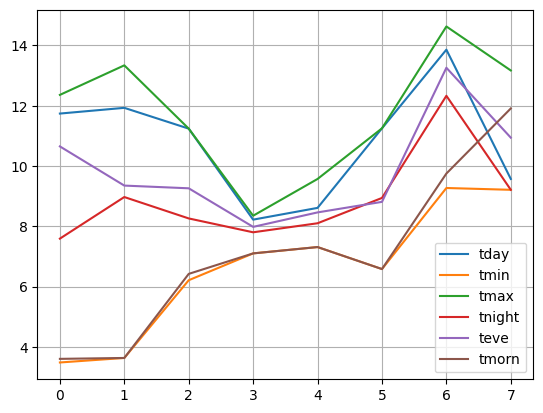

In [449]:
tmp.tday.plot(legend=True)
tmp.tmin.plot(legend=True)
tmp.tmax.plot(legend=True)
tmp.tnight.plot(legend=True)
tmp.teve.plot(legend=True)
tmp.tmorn.plot(legend=True,grid=True)

In [450]:
df['temp']

0    {'day': 11.74, 'min': 3.48, 'max': 12.36, 'nig...
1    {'day': 11.93, 'min': 3.63, 'max': 13.34, 'nig...
2    {'day': 11.24, 'min': 6.21, 'max': 11.24, 'nig...
3    {'day': 8.22, 'min': 7.1, 'max': 8.35, 'night'...
4    {'day': 8.61, 'min': 7.31, 'max': 9.57, 'night...
5    {'day': 11.25, 'min': 6.58, 'max': 11.25, 'nig...
6    {'day': 13.86, 'min': 9.27, 'max': 14.63, 'nig...
7    {'day': 9.57, 'min': 9.21, 'max': 13.17, 'nigh...
Name: temp, dtype: object

In [451]:
onecall_data

{'lat': 48.8833,
 'lon': 2.5333,
 'timezone': 'Europe/Paris',
 'timezone_offset': 3600,
 'current': {'dt': 1709834302,
  'sunrise': 1709792363,
  'sunset': 1709833352,
  'temp': 10.65,
  'feels_like': 9.57,
  'pressure': 1014,
  'humidity': 69,
  'dew_point': 5.2,
  'uvi': 0,
  'clouds': 75,
  'visibility': 10000,
  'wind_speed': 5.81,
  'wind_deg': 70,
  'wind_gust': 5.81,
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}]},
 'daily': [{'dt': 1709812800,
   'sunrise': 1709792363,
   'sunset': 1709833352,
   'moonrise': 1709788800,
   'moonset': 1709818560,
   'moon_phase': 0.89,
   'temp': {'day': 11.74,
    'min': 3.48,
    'max': 12.36,
    'night': 7.59,
    'eve': 10.65,
    'morn': 3.6},
   'feels_like': {'day': 10.48, 'night': 4.86, 'eve': 9.57, 'morn': 1.64},
   'pressure': 1018,
   'humidity': 58,
   'dew_point': 3.78,
   'wind_speed': 5.45,
   'wind_deg': 98,
   'wind_gust': 11.32,
   'weather': [{'id': 801,
     'main': 'C

## Using Class onecall_class

In [452]:

if debug: print('\n\nConverting to class ......')
cl = onecallclass(onecall_data)



Converting to class ......

Name of dictionary object: object
__name__
__doc__
__package__
__loader__
__spec__
__builtin__
__builtins__
_ih
_oh
_dh
In
Out
get_ipython
exit
quit
open
_

Global name :  _
__name__
__doc__
__package__
__loader__
__spec__
__builtin__
__builtins__
_ih
_oh
_dh
In
Out
get_ipython
exit
quit
open
_
Key  lat 48.8833
Key  lon 2.5333
Key  timezone Europe/Paris
Key  timezone_offset 3600
Key  current {'dt': 1709834302, 'sunrise': 1709792363, 'sunset': 1709833352, 'temp': 10.65, 'feels_like': 9.57, 'pressure': 1014, 'humidity': 69, 'dew_point': 5.2, 'uvi': 0, 'clouds': 75, 'visibility': 10000, 'wind_speed': 5.81, 'wind_deg': 70, 'wind_gust': 5.81, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]}
Key  daily [{'dt': 1709812800, 'sunrise': 1709792363, 'sunset': 1709833352, 'moonrise': 1709788800, 'moonset': 1709818560, 'moon_phase': 0.89, 'temp': {'day': 11.74, 'min': 3.48, 'max': 12.36, 'night': 7.59, 'eve': 10.65, 'morn': 3.6

In [453]:
cl.daily5.weather.main,cl.daily5.weather.description

('Rain', 'light rain')

In [454]:
cl.__dict__['daily'+str(0)].__dict__['weather'].__dict__

{'__name__': 'weather',
 'id': 801,
 'main': 'Clouds',
 'description': 'few clouds',
 'icon': '02d'}

In [455]:

if debug: print('--------------------------------------------------')
if debug: print(dir(cl))
if debug: print('Lat:',cl.lat)
if debug: print('Day 0:',dir(cl.daily0))


--------------------------------------------------
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'alerts', 'current', 'daily0', 'daily1', 'daily2', 'daily3', 'daily4', 'daily5', 'daily6', 'daily7', 'get_alerts', 'get_temperature', 'get_weather', 'human_dt', 'human_sr', 'human_ss', 'lat', 'lon', 'timezone', 'timezone_offset']
Lat: 48.8833
Day 0: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 

In [456]:
'sunrise:',human_date(cl.daily0.sunrise), 'sunset', human_date(cl.daily0.sunset), cl.daily0.weather.description

('sunrise:',
 '07/03/2024 07:19:23',
 'sunset',
 '07/03/2024 18:42:32',
 'few clouds')

In [457]:
#debug = True
if debug: print('Day 0:',cl.daily0.weather)
if debug: print('Day 0:',cl.daily0.temp.__dict__)
if debug: print('Day 0 temperature:',cl.daily0.weather.description)
if debug: print('Day 1 temperature:',cl.daily1.temp.day)

if debug: print(cl.__dict__['daily0'].__dict__)
if debug: print(cl.__dict__['daily0'].__dict__['temp'].__dict__)
if debug: print(cl.__dict__['daily0'].__dict__['weather'].main)


Day 0: <__main__.onecallclass object at 0x00000280B6C9D240>
Day 0: {'day': 11.74, 'min': 3.48, 'max': 12.36, 'night': 7.59, 'eve': 10.65, 'morn': 3.6, '__name__': 'temp'}
Day 0 temperature: few clouds
Day 1 temperature: 11.93
{'__name__': 'daily0', 'human_dt': '07/03/2024 13:00:00', 'dt': 1709812800, 'sunrise': 1709792363, 'sunset': 1709833352, 'moonrise': 1709788800, 'moonset': 1709818560, 'moon_phase': 0.89, 'temp': <__main__.Dict2Class object at 0x00000280B6C9D3F0>, 'feels_like': <__main__.Dict2Class object at 0x00000280B6C9C730>, 'pressure': 1018, 'humidity': 58, 'dew_point': 3.78, 'wind_speed': 5.45, 'wind_deg': 98, 'wind_gust': 11.32, 'weather': <__main__.onecallclass object at 0x00000280B6C9D240>, 'clouds': 19, 'pop': 0, 'uvi': 2.45}
{'day': 11.74, 'min': 3.48, 'max': 12.36, 'night': 7.59, 'eve': 10.65, 'morn': 3.6, '__name__': 'temp'}
Clouds


In [458]:
for k in range(8):
    if debug: print(cl.__dict__['daily'+str(k)].__dict__['temp'].__dict__['day'])
    
t_day,t_min, t_max, t_night, t_eve, t_morn = cl.get_temperature()
t_day,t_min, t_max, t_night, t_eve, t_morn


11.74
11.93
11.24
8.22
8.61
11.25
13.86
9.57


([11.74, 11.93, 11.24, 8.22, 8.61, 11.25, 13.86, 9.57],
 [3.48, 3.63, 6.21, 7.1, 7.31, 6.58, 9.27, 9.21],
 [12.36, 13.34, 11.24, 8.35, 9.57, 11.25, 14.63, 13.17],
 [7.59, 8.97, 8.26, 7.8, 8.1, 8.94, 12.33, 9.21],
 [10.65, 9.35, 9.26, 7.98, 8.46, 8.81, 13.26, 10.94],
 [3.6, 3.63, 6.42, 7.1, 7.31, 6.58, 9.75, 11.91])

In [459]:

# get alerts
cl.get_alerts()


Start: Thu Mar  7 16:01:14 2024 
End: Fri Mar  8 00:00:00 2024
Moderate damages may occur, especially in vulnerable or in exposed areas and to people who carry out weather-related activities.
Moderate flooding warning ['Flood']
Source: METEO-FRANCE

Start: Thu Mar  7 16:01:14 2024 
End: Fri Mar  8 00:00:00 2024
Moderate damages may occur, especially in vulnerable or in exposed areas and to people who carry out weather-related activities.
Moderate flooding warning ['Flood']
Source: METEO-FRANCE



### dewpoint & depression

In [460]:
df6=df5[['temp','dewpoint','depression']]

df6

,temp,dewpoint,depression
0,11.74,3.78,7.96
1,11.93,2.66,9.27
2,11.24,4.44,6.80
3,8.22,6.39,1.83
4,8.61,6.33,2.28
5,11.25,3.37,7.88
6,13.86,9.02,4.84
7,9.57,5.21,4.36


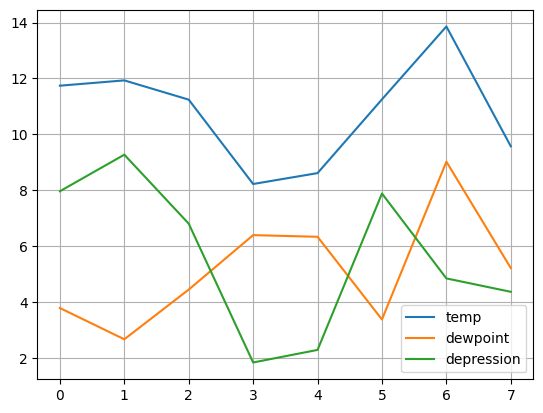

In [461]:
import matplotlib.pyplot as plt
df6.plot()
plt.grid()

In [462]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

now = dt.datetime.now()
then = now + dt.timedelta(days=8)
now,then

(datetime.datetime(2024, 3, 7, 18, 58, 23, 121810),
 datetime.datetime(2024, 3, 15, 18, 58, 23, 121810))

In [463]:
days = mdates.drange(now,then,dt.timedelta(days=1))
days


array([19789.79054539, 19790.79054539, 19791.79054539, 19792.79054539,
       19793.79054539, 19794.79054539, 19795.79054539, 19796.79054539])

In [464]:
[human_date(d[i]['dt']) for i in  range(8)]

['07/03/2024 13:00:00',
 '08/03/2024 13:00:00',
 '09/03/2024 13:00:00',
 '10/03/2024 13:00:00',
 '11/03/2024 12:00:00',
 '12/03/2024 12:00:00',
 '13/03/2024 12:00:00',
 '14/03/2024 12:00:00']

In [465]:
[human_date(x) for x in days]

['01/01/1970 06:29:49',
 '01/01/1970 06:29:50',
 '01/01/1970 06:29:51',
 '01/01/1970 06:29:52',
 '01/01/1970 06:29:53',
 '01/01/1970 06:29:54',
 '01/01/1970 06:29:55',
 '01/01/1970 06:29:56']

In [466]:
amplitude = [d-n for d,n in zip(t_max,t_min)]
amplitude

[8.879999999999999,
 9.71,
 5.03,
 1.25,
 2.2600000000000007,
 4.67,
 5.360000000000001,
 3.959999999999999]

In [467]:
day_night_diff = [d-n for d,n in zip(t_morn,t_night)]
day_night_diff

[-3.9899999999999998,
 -5.340000000000001,
 -1.8399999999999999,
 -0.7000000000000002,
 -0.79,
 -2.3599999999999994,
 -2.58,
 2.6999999999999993]

In [468]:
day0

In [469]:
day_dt = day0.dt # type(dt) : timestamp
#datetime.fromtimestamp(day_dt, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
human_date(day_dt)

'07/03/2024 13:00:00'

In [470]:
type(datetime.fromtimestamp(day_dt))

datetime.datetime

In [471]:
[human_date(d[i]['dt']) for i in  range(8)]

['07/03/2024 13:00:00',
 '08/03/2024 13:00:00',
 '09/03/2024 13:00:00',
 '10/03/2024 13:00:00',
 '11/03/2024 12:00:00',
 '12/03/2024 12:00:00',
 '13/03/2024 12:00:00',
 '14/03/2024 12:00:00']

In [472]:
df6

,temp,dewpoint,depression
0,11.74,3.78,7.96
1,11.93,2.66,9.27
2,11.24,4.44,6.80
3,8.22,6.39,1.83
4,8.61,6.33,2.28
5,11.25,3.37,7.88
6,13.86,9.02,4.84
7,9.57,5.21,4.36


In [473]:
real_days=[d[i]['dt'] for i in  range(8)]
real_days

[1709812800,
 1709899200,
 1709985600,
 1710072000,
 1710154800,
 1710241200,
 1710327600,
 1710414000]

In [474]:
# add column days
pd.DataFrame(days,columns=['days'])
pd.DataFrame(real_days,columns=['real_days'])
df6=df6.join(pd.DataFrame(days,columns=['days']))
df6=df6.join(pd.DataFrame(real_days,columns=['real_days']))
df6
#df6['days']=days
#df6.loc[:,'days']=days
#df6

,temp,dewpoint,depression,days,real_days
0,11.74,3.78,7.96,19789.790545,1709812800
1,11.93,2.66,9.27,19790.790545,1709899200
2,11.24,4.44,6.80,19791.790545,1709985600
3,8.22,6.39,1.83,19792.790545,1710072000
4,8.61,6.33,2.28,19793.790545,1710154800
5,11.25,3.37,7.88,19794.790545,1710241200
6,13.86,9.02,4.84,19795.790545,1710327600
7,9.57,5.21,4.36,19796.790545,1710414000


In [475]:
df6['h_date']=df6['days'].apply(lambda x:  human_date(x))
df6['h_real_date']=df6['real_days'].apply(lambda x:  human_date(x))
df6

,temp,dewpoint,depression,days,real_days,h_date,h_real_date
0,11.74,3.78,7.96,19789.790545,1709812800,01/01/1970 06:29:49,07/03/2024 13:00:00
1,11.93,2.66,9.27,19790.790545,1709899200,01/01/1970 06:29:50,08/03/2024 13:00:00
2,11.24,4.44,6.80,19791.790545,1709985600,01/01/1970 06:29:51,09/03/2024 13:00:00
3,8.22,6.39,1.83,19792.790545,1710072000,01/01/1970 06:29:52,10/03/2024 13:00:00
4,8.61,6.33,2.28,19793.790545,1710154800,01/01/1970 06:29:53,11/03/2024 12:00:00
5,11.25,3.37,7.88,19794.790545,1710241200,01/01/1970 06:29:54,12/03/2024 12:00:00
6,13.86,9.02,4.84,19795.790545,1710327600,01/01/1970 06:29:55,13/03/2024 12:00:00
7,9.57,5.21,4.36,19796.790545,1710414000,01/01/1970 06:29:56,14/03/2024 12:00:00


## Graph


Text(0.5, 1.0, 'Current temp : 10.65 °C / hum: 69% (07/03/24 18:58:23)\nRain:light rain')

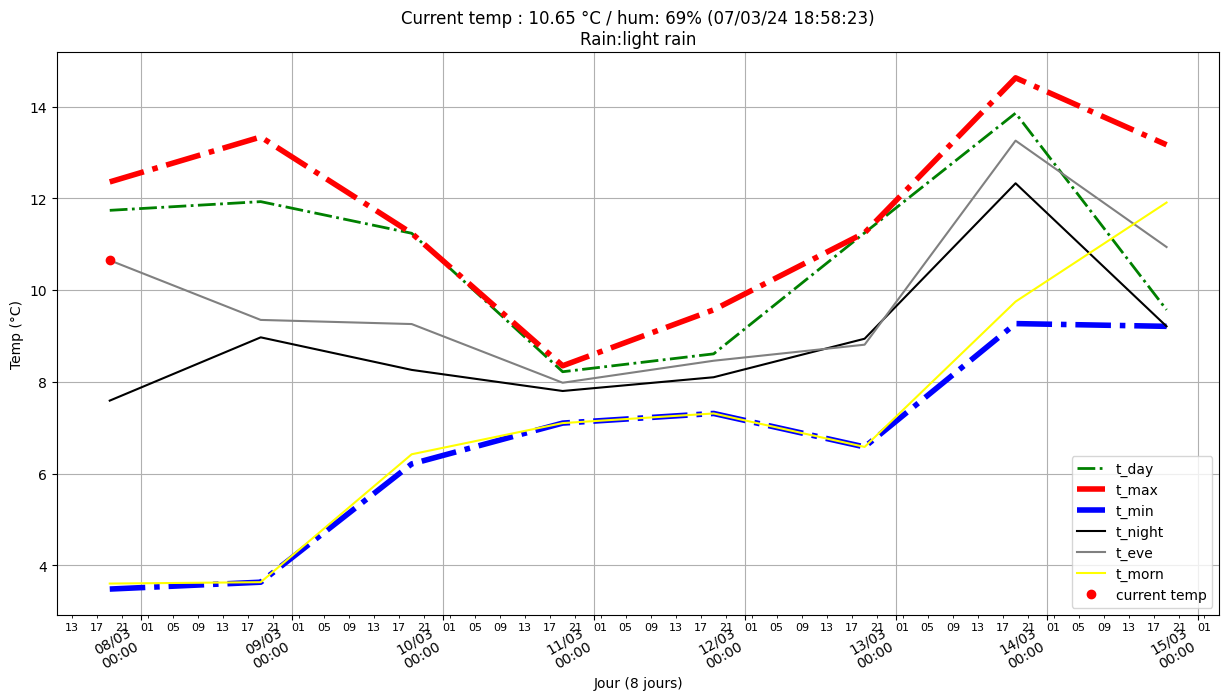

In [476]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8.27)

# customize axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=4))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%H'))
ax.tick_params(which='minor', axis='x', labelsize=8, rotation=0)
plt.gcf().autofmt_xdate()

#plot curves
plt.plot(days,t_day,'g-.',label='t_day',linewidth=2)

plt.plot(days,t_max,'r-.',label='t_max',linewidth=4)

plt.plot(days,t_min,'b-.',label='t_min',linewidth=4)

plt.plot(days,t_night,'black',label='t_night')

plt.plot(days,t_eve,'gray',label='t_eve')
#plt.plot(days,amplitude,'b+-',label='diff max/min')
#plt.plot(days,day_night_diff,'b+-',label='diff matin/nuit')

plt.plot(days,t_morn,'yellow',label='t_morn')
plt.plot(days[0], cl.current.temp,'ro',label='current temp')
plt.xlabel("Jour (8 jours)")
plt.ylabel("Temp (°C)")
plt.grid()
plt.legend()
plt.title('Current temp : '+str(cl.current.temp)+' °C / hum: '+ str(cl.current.humidity)+'% ('+datetime.now().strftime('%d/%m/%y %H:%M:%S'+')\n'+cl.get_weather()[1][0]+':'+cl.get_weather()[1][1]))
#plt.show()

In [477]:
df6['tendances']=df6['depression'].apply(lambda x: 'pluie' if x<5 else 'beau temps')

In [478]:
df6

,temp,dewpoint,depression,days,real_days,h_date,h_real_date,tendances
0,11.74,3.78,7.96,19789.790545,1709812800,01/01/1970 06:29:49,07/03/2024 13:00:00,beau temps
1,11.93,2.66,9.27,19790.790545,1709899200,01/01/1970 06:29:50,08/03/2024 13:00:00,beau temps
2,11.24,4.44,6.80,19791.790545,1709985600,01/01/1970 06:29:51,09/03/2024 13:00:00,beau temps
3,8.22,6.39,1.83,19792.790545,1710072000,01/01/1970 06:29:52,10/03/2024 13:00:00,pluie
4,8.61,6.33,2.28,19793.790545,1710154800,01/01/1970 06:29:53,11/03/2024 12:00:00,pluie
5,11.25,3.37,7.88,19794.790545,1710241200,01/01/1970 06:29:54,12/03/2024 12:00:00,beau temps
6,13.86,9.02,4.84,19795.790545,1710327600,01/01/1970 06:29:55,13/03/2024 12:00:00,pluie
7,9.57,5.21,4.36,19796.790545,1710414000,01/01/1970 06:29:56,14/03/2024 12:00:00,pluie


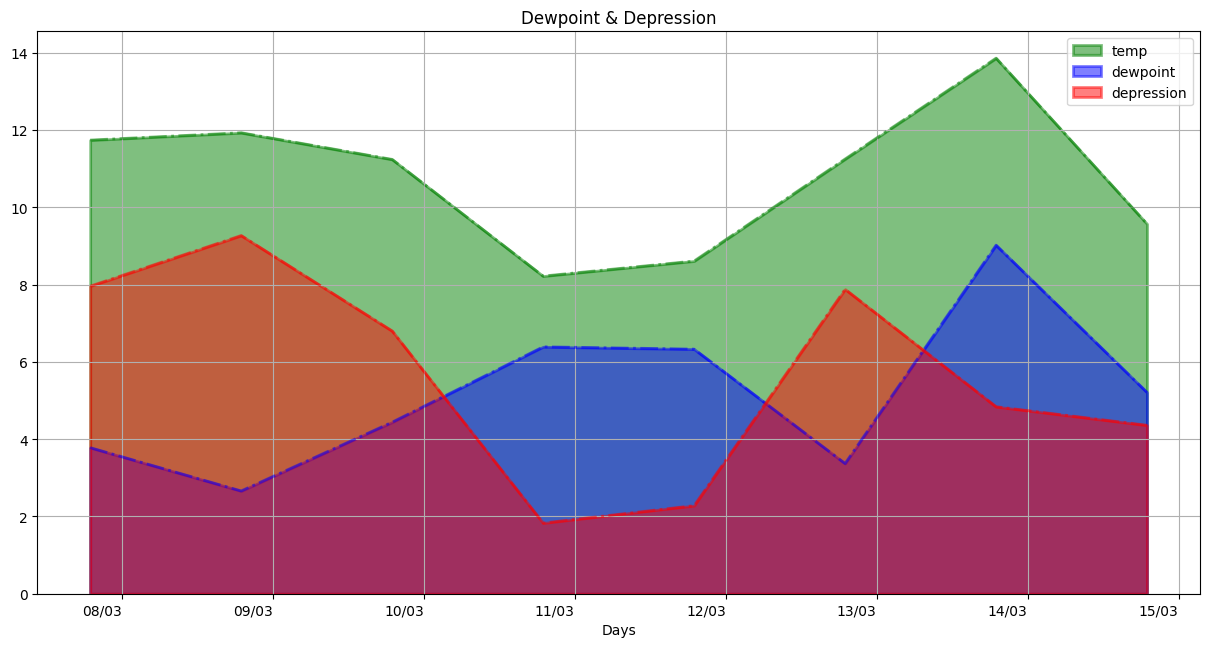

In [479]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
fig, ax = plt.subplots()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()
data=df6[['temp','dewpoint','depression','days']]
data.plot.area(x='days',xlabel='Days',figsize=(15, 8.27),ax=ax, fontsize=10,grid=True, legend=True, title='Dewpoint & Depression',stacked=False,style=['g-.','b-.','r-.'],linewidth=2)

# only depression
#df6.plot.area(y='depression',xlabel='Days',figsize=(15, 8.27),ax=ax, fontsize=10,grid=True, legend=True, title='Dewpoint & Depression',stacked=False,style=['g-.','b-.','r-.'],linewidth=2)

for line in ax.get_lines():
    if line.get_label() == 'depression':
        line.set_linewidth(5)

In [480]:
df6.loc[0]

temp                         11.74
dewpoint                      3.78
depression                    7.96
days                  19789.790545
real_days               1709812800
h_date         01/01/1970 06:29:49
h_real_date    07/03/2024 13:00:00
tendances               beau temps
Name: 0, dtype: object

In [481]:
for d in range(8):
    print('Day +',d+1,':',cl.get_weather()[d])

Day + 1 : ['Clouds', 'few clouds']
Day + 2 : ['Rain', 'light rain']
Day + 3 : ['Rain', 'light rain']
Day + 4 : ['Rain', 'light rain']
Day + 5 : ['Rain', 'light rain']
Day + 6 : ['Rain', 'light rain']
Day + 7 : ['Clouds', 'overcast clouds']
Day + 8 : ['Rain', 'moderate rain']


In [482]:
datetime.now().strftime('%d/%m/%Y %H:%M:%S')

'07/03/2024 18:58:27'

In [483]:
# tmax - tmin
amplitude

[8.879999999999999,
 9.71,
 5.03,
 1.25,
 2.2600000000000007,
 4.67,
 5.360000000000001,
 3.959999999999999]

In [484]:
print('Morning, Night, Delta')
[(d,n,n-d) for d,n in zip(t_morn,t_night)]

Morning, Night, Delta


[(3.6, 7.59, 3.9899999999999998),
 (3.63, 8.97, 5.340000000000001),
 (6.42, 8.26, 1.8399999999999999),
 (7.1, 7.8, 0.7000000000000002),
 (7.31, 8.1, 0.79),
 (6.58, 8.94, 2.3599999999999994),
 (9.75, 12.33, 2.58),
 (11.91, 9.21, -2.6999999999999993)]

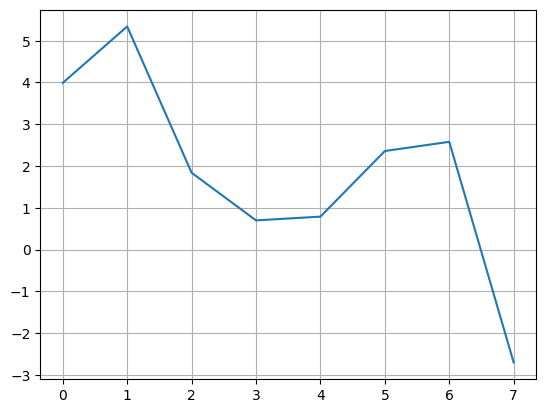

In [485]:
plt.plot([n-d for d,n in zip(t_morn,t_night)])
plt.grid()

In [486]:
import numpy as np
np.mean(t_max), np.mean(t_day), np.mean(t_night), np.mean(t_min)

(11.73875, 10.8025, 8.9, 6.598750000000001)

In [487]:
#debug = True
#show_attributes('\nCurrent attribs',onecall_current)
show_attributes('\nCurrent attribs',cl.current)


Current attribs :
clouds : 75
dew_point : 5.2
dt : 1709834302
feels_like : 9.57
human_dt : 07/03/2024 18:58:22
humidity : 69
pressure : 1014
sunrise : 1709792363
sunset : 1709833352
temp : 10.65
uvi : 0
visibility : 10000
weather : [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]
wind_deg : 70
wind_gust : 5.81
wind_speed : 5.81


In [488]:
cl.current.human_dt

'07/03/2024 18:58:22'

In [489]:
sr = cl.current.sunrise
ss = cl.current.sunset
sr, ss


(1709792363, 1709833352)

In [490]:
human_date(sr), human_date(ss)

('07/03/2024 07:19:23', '07/03/2024 18:42:32')